### Define Data Quality KPIs

**Task 1**: Identify Relevant KPIs

**Objective**: Develop KPIs that align with organizational goals.

**Steps**:
1. Choose a dataset from a domain of your interest (e.g., sales data, healthcare records, or transaction logs).
2. Identify three KPIs that would be crucial for assessing the data quality in your chosen dataset. Consider accuracy, completeness, and timeliness.
3. Document why each KPI is important for maintaining high-quality data in your given context.

In [11]:
# Write your code from here
import pandas as pd
from datetime import datetime, timedelta

# Sample mock hospital data
data = {
    'patient_id': ['P001', 'P002', 'P003', None, 'P005'],
    'diagnosis_code': ['D123', 'D456', 'D789', 'D101', ''],  # '' is invalid
    'medication_dosage': [500, 250, None, 300, 400],
    'discharge_date': [
        '2024-06-01', '2024-06-03', '2024-06-05', '2024-06-08', '2024-06-10'
    ],
    'record_update_date': [
        '2024-06-01', '2024-06-05', '2024-06-08', '2024-06-15', '2024-06-15'
    ]
}

df = pd.DataFrame(data)

# Convert date fields to datetime
df['discharge_date'] = pd.to_datetime(df['discharge_date'], errors='coerce')
df['record_update_date'] = pd.to_datetime(df['record_update_date'], errors='coerce')

# ----- 1. Accuracy Rate -----
# Simulate that valid diagnosis codes are non-empty and medication dosage is not null
df['is_accurate'] = df['diagnosis_code'].str.startswith('D') & df['medication_dosage'].notnull()
accuracy_rate = (df['is_accurate'].sum() / len(df)) * 100

# ----- 2. Completeness Score -----
# Mandatory fields: patient_id, diagnosis_code, medication_dosage, discharge_date
df['is_complete'] = df[['patient_id', 'diagnosis_code', 'medication_dosage', 'discharge_date']].notnull().all(axis=1)
completeness_score = (df['is_complete'].sum() / len(df)) * 100

# ----- 3. Timeliness Index -----
# Consider records updated within 2 days of discharge as timely
df['timely'] = (df['record_update_date'] - df['discharge_date']) <= timedelta(days=2)
timeliness_index = (df['timely'].sum() / len(df)) * 100

# ----- Display KPIs -----
print(f"Accuracy Rate: {accuracy_rate:.2f}%")
print(f"Completeness Score: {completeness_score:.2f}%")
print(f"Timeliness Index: {timeliness_index:.2f}%")


Accuracy Rate: 60.00%
Completeness Score: 60.00%
Timeliness Index: 40.00%


**Task 2**: Develop a KPI Dashboard

**Objective**: Visualize your KPIs for better monitoring.

**Steps**:
1. Use a tool like Excel or a BI tool (e.g., Tableau, Power BI) to create a simple dashboard.
2. Input sample data and visualize your chosen KPIs, showing how they would be monitored.
3. Share your dashboard with peers and gather feedback on KPI relevance and clarity.

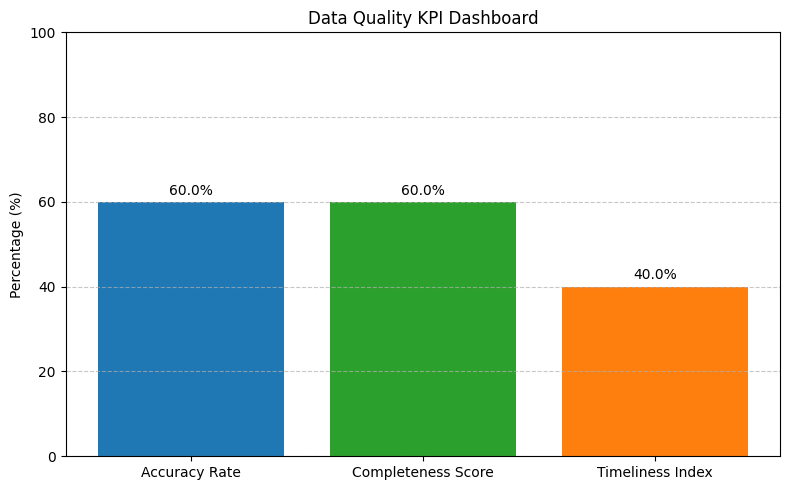

In [12]:
# Write your code from here
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Sample data
data = {
    'patient_id': ['P001', 'P002', 'P003', None, 'P005'],
    'diagnosis_code': ['D123', 'D456', 'D789', 'D101', ''],
    'medication_dosage': [500, 250, None, 300, 400],
    'discharge_date': ['2024-06-01', '2024-06-03', '2024-06-05', '2024-06-08', '2024-06-10'],
    'record_update_date': ['2024-06-01', '2024-06-05', '2024-06-08', '2024-06-15', '2024-06-15']
}

df = pd.DataFrame(data)
df['discharge_date'] = pd.to_datetime(df['discharge_date'], errors='coerce')
df['record_update_date'] = pd.to_datetime(df['record_update_date'], errors='coerce')

# KPI Calculations
df['is_accurate'] = df['diagnosis_code'].str.startswith('D') & df['medication_dosage'].notnull()
df['is_complete'] = df[['patient_id', 'diagnosis_code', 'medication_dosage', 'discharge_date']].notnull().all(axis=1)
df['timely'] = (df['record_update_date'] - df['discharge_date']) <= timedelta(days=2)

# Calculate KPI values
accuracy_rate = round((df['is_accurate'].sum() / len(df)) * 100, 2)
completeness_score = round((df['is_complete'].sum() / len(df)) * 100, 2)
timeliness_index = round((df['timely'].sum() / len(df)) * 100, 2)

# Create a dashboard-style bar chart
kpi_names = ['Accuracy Rate', 'Completeness Score', 'Timeliness Index']
kpi_values = [accuracy_rate, completeness_score, timeliness_index]

plt.figure(figsize=(8, 5))
bars = plt.bar(kpi_names, kpi_values, color=['#1f77b4', '#2ca02c', '#ff7f0e'])
plt.ylim(0, 100)
plt.ylabel('Percentage (%)')
plt.title('Data Quality KPI Dashboard')

# Add labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 1, f'{height}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
